In [2]:
from data import MscDataset
from model import load_transformer_LM_tokenizer

%load_ext autoreload
%autoreload 2

In [33]:
from main import ExperimentArgs
from trainer import RMTTrainingArgs

args = ExperimentArgs()
rmt_train_args = RMTTrainingArgs()

_, tokenizer = load_transformer_LM_tokenizer(args.model_name,
                                             tokenizer_name_or_path=args.tokenizer_name,
                                             memory_length=10)

train_dataset = MscDataset(
    tokenizer,
    args.train_data_path,
    max_length=-1,
    memory_length=10,
    memory_position=rmt_train_args.memory_position,
    max_session=4,
    mode='train',
)
valid_dataset = MscDataset(
    tokenizer,
    args.validation_data_path,
    max_length=-1,
    memory_length=10,
    max_session=5,
    mode='eval',
)
test_dataset = MscDataset(
    tokenizer,
    args.test_data_path,
    max_length=-1,
    memory_length=10,
    max_session=5,
    mode='eval',
)

load data:   0%|          | 0/1001 [00:00<?, ?it/s]

format data:   0%|          | 0/1001 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (134 > 128). Running this sequence through the model will result in indexing errors


load data:   0%|          | 0/500 [00:00<?, ?it/s]

format data:   0%|          | 0/500 [00:00<?, ?it/s]

load data:   0%|          | 0/501 [00:00<?, ?it/s]

format data:   0%|          | 0/501 [00:00<?, ?it/s]

In [34]:
train_dataset.tokenizer.decode(train_dataset[0]['input_ids'])

"[mem_0] [mem_1] [mem_2] [mem_3] [mem_4] [mem_5] [mem_6] [mem_7] [mem_8] [mem_9] [Speaker 1]: Hi! I'm brian. How are you?</s>"

## Data Length Stats

In [42]:
import numpy as np
train_lengths = np.array([len(data['input_ids']) - (rmt_train_args.memory_length + 1) for data in train_dataset])
valid_lengths = np.array([len(data['input_ids']) - (rmt_train_args.memory_length + 1) for data in valid_dataset])
test_lengths = np.array([len(data['input_ids']) - (rmt_train_args.memory_length + 1) for data in test_dataset])


print('max\tmean\tstd')
print(train_lengths.max(), train_lengths.mean(), train_lengths.std())
print(valid_lengths.max(), valid_lengths.mean(), valid_lengths.std())
print(test_lengths.max(), test_lengths.mean(), test_lengths.std())

max	mean	std
2331 741.1497377108947 513.0172789045246
3132 973.7305888820619 654.3543840169164
3099 981.2028237030081 656.9865624819699


Text(0.5, 1.0, 'test')

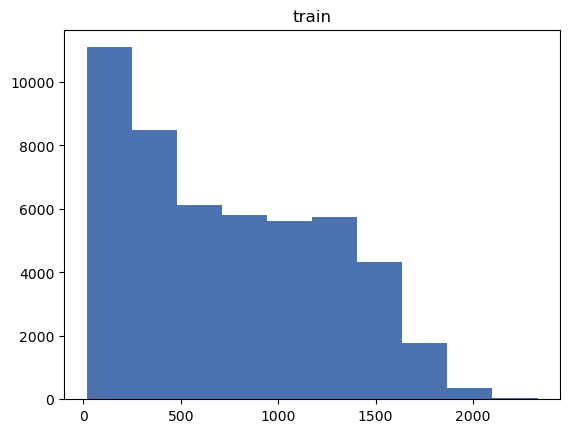

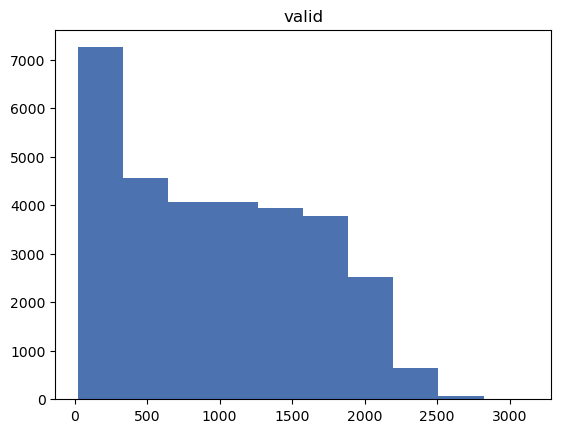

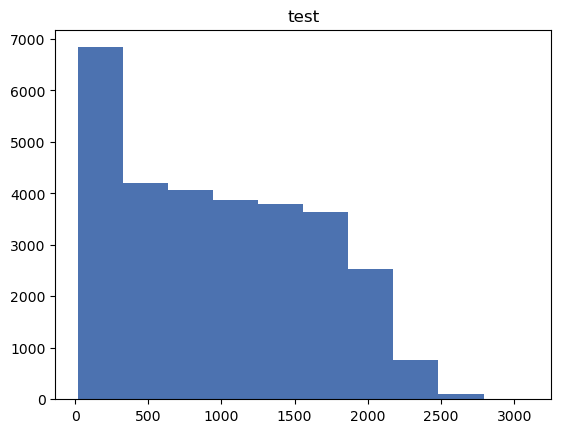

In [41]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(train_lengths)
plt.title('train')
plt.figure()
plt.hist(valid_lengths)
plt.title('valid')
plt.figure()
plt.hist(test_lengths)
plt.title('test')